In [12]:
import numpy
import py_entropy
from matplotlib import pyplot
from tqdm.notebook import tqdm

# Spin 1 Chain

To switch between languages for the spins and the API we will use n=0,1,2... for the implementation and m=-1,0,1... for the spins.

In [2]:
sizes = []
ls = numpy.arange(2,13)
for l in ls:
    g = py_entropy.GenericMultiDefectState(l, l, [1,1,1], parallel_matrix_mul=True, num_experiments=16)
    sizes.append(g.get_states().shape[0])

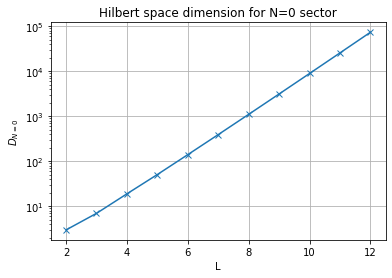

In [3]:
pyplot.plot(ls, sizes, 'x-')
pyplot.yscale('log')
pyplot.grid()
pyplot.xlabel('L')
pyplot.ylabel(r'$D_{N=0}$')
pyplot.title('Hilbert space dimension for N=0 sector')
pyplot.show()

# N=0 Sector

We simulate spin one by allowing each site to have 1 internal state for local n = {0,1,2}. We then fill to global number sector equal to L (so one such state is each site has n=1). This is equivalent to the global 0 sector with m={-1,0,1} for spin=1 sites.

We simulate the n=0 sector for s=1/2 by allowing each site to take n={0,1} with 1 internal state each then filling to L/2.

We will start both completely polarized (all spins in a given direction are grouped together, the lowest "index" state)

$$\vert \psi_{S=1} \rangle = \otimes_i^L \vert m_i = 0\rangle$$
$$\vert \psi_{S=1/2} \rangle = \otimes_{i=0}^\frac{L}{2} \vert m_i = \frac{1}{2}\rangle \otimes_{i=\frac{L}{2}}^L \vert m_i = -\frac{1}{2}\rangle$$

In [13]:
ls = [4,6,8,10,12,14]

all_spin_one_purities = []
all_spin_half_purities = []
for l in tqdm(ls):
    g = py_entropy.GenericMultiDefectState(l, l, [1,1,1], parallel_matrix_mul=True, num_experiments=16)
    spin_one_purities = g.apply_layers_and_save_mean_purity(500)
    n_one_states = g.get_states().shape[0]

    g = py_entropy.GenericMultiDefectState(l, l//2, [1,1], parallel_matrix_mul=True, num_experiments=16)
    spin_half_purities = g.apply_layers_and_save_mean_purity(500)
    n_half_states = g.get_states().shape[0]
    
    all_spin_one_purities.append(spin_one_purities)
    all_spin_half_purities.append(spin_half_purities)
all_spin_one_purities = numpy.array(all_spin_one_purities)
all_spin_half_purities = numpy.array(all_spin_half_purities)

  0%|          | 0/6 [00:00<?, ?it/s]

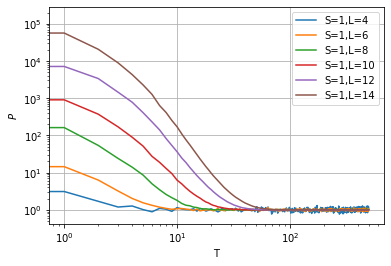

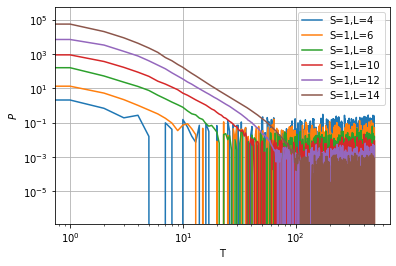

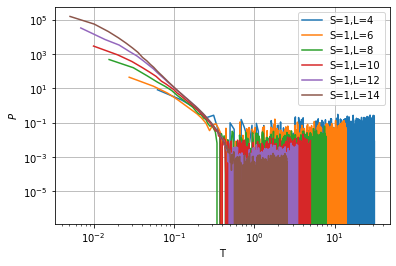

In [14]:
for l,one_pur,half_pur in zip(ls, all_spin_one_purities, all_spin_half_purities):
    pyplot.plot(one_pur, label=f'S=1,L={l}')
#     pyplot.plot(half_pur, label=f'S=1/2,L={l}')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for l,one_pur,half_pur in zip(ls, all_spin_one_purities, all_spin_half_purities):
    pyplot.plot(one_pur-1.0, label=f'S=1,L={l}')
#     pyplot.plot(half_pur-1.0, label=f'S=1/2,L={l}')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for l,one_pur,half_pur in zip(ls, all_spin_one_purities, all_spin_half_purities):
    pyplot.plot(numpy.arange(1,len(one_pur)+1)/l**2, one_pur-1.0, label=f'S=1,L={l}')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.grid()
pyplot.legend()
pyplot.show()

# for l,one_pur,half_pur in zip(ls, all_spin_one_purities, all_spin_half_purities):
#     pyplot.plot(numpy.arange(1,len(one_pur)+1)/l**2, half_pur-1.0, label=f'S=1/2,L={l}')
# pyplot.yscale('log')
# pyplot.xscale('log')
# pyplot.xlabel('T')
# pyplot.ylabel('$P$')
# pyplot.grid()
# pyplot.legend()
# pyplot.show()

# N = 1-L

All sites are m=-1 except one is m=0.

We will actually simulate all n=0 except one n=1 instead

$$\vert \psi_{S = 1} \rangle = \vert m=-1 \rangle^{\otimes L-1} \vert m=0 \rangle$$

$$\vert \psi_{S = 1/2} \rangle = \vert m=-\frac{1}{2} \rangle^{\otimes L-1} \vert m=\frac{1}{2} \rangle$$

In [6]:
l = 12

g = py_entropy.GenericMultiDefectState(l, 1, [1,1,1], parallel_matrix_mul=True, num_experiments=256)
spin_one_purities = g.apply_layers_and_save_mean_purity(500)
n_one_states = g.get_states().shape[0]

g = py_entropy.GenericMultiDefectState(l, 1, [1,1], parallel_matrix_mul=True, num_experiments=256)
spin_half_purities = g.apply_layers_and_save_mean_purity(500)
n_half_states = g.get_states().shape[0]

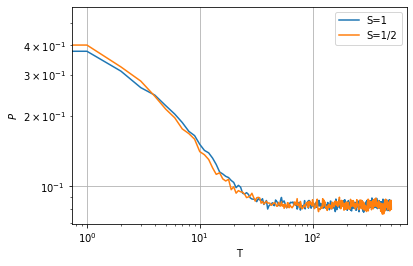

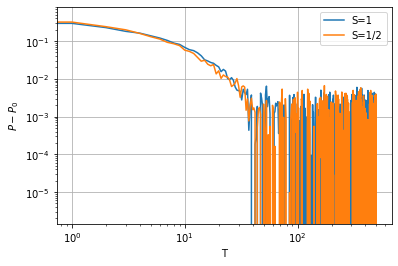

In [7]:
pyplot.plot(spin_one_purities, label='S=1')
pyplot.plot(spin_half_purities, label='S=1/2')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.grid()
pyplot.legend()
pyplot.show()

pyplot.plot(spin_one_purities - 1.0, label='S=1')
pyplot.plot(spin_half_purities - 1.0, label='S=1/2')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P - P_0$')
pyplot.grid()
pyplot.legend()
pyplot.show()

# N = 2-L

$$\vert \psi_{S = 1} \rangle = \vert m=-1 \rangle^{\otimes L-2} \vert m=0 \rangle^{\otimes 2}$$

$$\vert \psi_{S = 1/2} \rangle = \vert m=-\frac{1}{2} \rangle^{\otimes L-2} \vert m=\frac{1}{2} \rangle^{\otimes 2}$$

In [8]:
l = 12

g = py_entropy.GenericMultiDefectState(l, 2, [1,1,1], parallel_matrix_mul=True, num_experiments=256)
spin_one_purities = g.apply_layers_and_save_mean_purity(500)
n_one_states = g.get_states().shape[0]

g = py_entropy.GenericMultiDefectState(l, 2, [1,1], parallel_matrix_mul=True, num_experiments=256)
spin_half_purities = g.apply_layers_and_save_mean_purity(500)
n_half_states = g.get_states().shape[0]

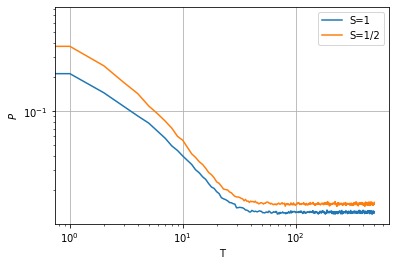

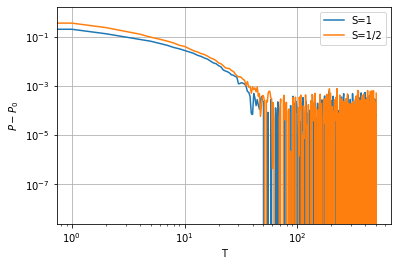

In [9]:
pyplot.plot(spin_one_purities, label='S=1')
pyplot.plot(spin_half_purities, label='S=1/2')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.grid()
pyplot.legend()
pyplot.show()

pyplot.plot(spin_one_purities - 1.0, label='S=1')
pyplot.plot(spin_half_purities - 1.0, label='S=1/2')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P - P_0$')
pyplot.grid()
pyplot.legend()
pyplot.show()